In [1]:
# import sys

# print("--sys.version—")
# print(sys.version)
# print(sys.executable)
# print(sys.path)
# sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '180713_2.csv'
df = pd.read_csv(f'..//Data//metroKOR//{filename}')
print(df.columns)

Index(['번호', '시간', 'FWD', 'REV', 'P/B', 'Motoring', 'Braking',
       'Train In Station', 'OP Mode', 'Target Speed', 'Permitted Speed',
       'Actual Speed', 'DISTANCE', 'Train Speed', 'VOBC ＃1', 'VOBC ＃0',
       'MR Pressure', 'Master Clock of VOBC', 'Line Voltage',
       'Train In Station.1', 'Next Platform ID', 'Final Platform ID',
       'Distance to Target', 'BC ＃1', 'BC ＃2', 'BC ＃3', 'BC ＃4', 'Unnamed: 27',
       'Unnamed: 28', 'BC ＃7', 'BC ＃0', 'Train Room Temp ＃1',
       'Train Outside Temp ＃1', '편성번호', '열차길이'],
      dtype='object')


In [3]:
for a in range(43004):
    if not df['Train In Station'][a] == df['Train In Station.1'][a]:
        print('!')

In [4]:
print(df['OP Mode'].unique())
print(df['편성번호'].unique()) 
print(df['열차길이'].unique())
print(df['VOBC ＃1'].unique())
print(df['VOBC ＃0'].unique())

['Driverless']
[1002]
[6]
[1]
[1]


In [5]:
df.drop(['번호', 
         'OP Mode', 
         '편성번호', 
         '열차길이',
         'VOBC ＃1',
         'VOBC ＃0',
         'Master Clock of VOBC',
         'Train In Station.1',
         'Next Platform ID', 
         'Final Platform ID',
         'BC ＃1', 
         'BC ＃2', 
         'BC ＃3', 
         'BC ＃4',      
         'Unnamed: 27', 
         'Unnamed: 28',
         'BC ＃7', 
         'BC ＃0',
         'Train Room Temp ＃1',
         'Train Outside Temp ＃1'
        ], axis=1, inplace=True) #열 삭제 후 df 대체 

In [6]:
df.rename(columns={'시간': 'time'}, inplace=True)
df.columns = df.columns.str.lower()

In [7]:
df['time'] = pd.to_datetime('20' + filename[:-6] + df['time'].str.replace(':', ''))
#df['time'] = df['time'].str.replace(':', '')
#df['time'] = df['time'].astype('int64')

In [8]:
threewords = ['p/b', 'distance', 'line voltage', 'distance to target']

# 'p/b' (%)
# 'distance' (m)
# 'line voltage' (V)
# 'distance to target' (m)

for word in threewords:
    df[f'{word}'] = df[f'{word}'].str[:-3]
    df[f'{word}'] = df[f'{word}'].astype('int64')

df['mr pressure'] = df['mr pressure'].str[:-5] #(mpa?) (kpa?)
df['mr pressure'] = df['mr pressure'].str.replace('．', '.')
df['mr pressure'] = df['mr pressure'].astype('float64')

speedwords = ['target', 'permitted', 'actual', 'train']
for word in speedwords:
    df[f'{word} speed'] = df[f'{word} speed'].str[:-6]
    df[f'{word} speed'] = df[f'{word} speed'].astype('int64')

In [9]:
# print(df.shape)
# print(df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43004 entries, 0 to 43003
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                43004 non-null  datetime64[ns]
 1   fwd                 43004 non-null  int64         
 2   rev                 43004 non-null  int64         
 3   p/b                 43004 non-null  int64         
 4   motoring            43004 non-null  int64         
 5   braking             43004 non-null  int64         
 6   train in station    43004 non-null  int64         
 7   target speed        43004 non-null  int64         
 8   permitted speed     43004 non-null  int64         
 9   actual speed        43004 non-null  int64         
 10  distance            43004 non-null  int64         
 11  train speed         43004 non-null  int64         
 12  mr pressure         43004 non-null  float64       
 13  line voltage        43004 non-null  int64     

In [10]:
df.describe() # 통계값들

,fwd,rev,p/b,motoring,braking,train in station,target speed,permitted speed,actual speed,distance,train speed,mr pressure,line voltage,distance to target
count,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000
mean,0.478072,0.424123,-2.674286,0.365571,0.433448,0.163194,1.953423,46.706748,39.484374,1670.239396,38.985722,8.456630,25232.027253,2193.493908
std,0.499525,0.494215,39.284994,0.481595,0.495557,0.369547,9.779357,33.687426,34.349977,1676.838522,33.929602,0.253749,378.950603,1850.793757
min,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.100000,22950.000000,0.000000
25%,0.000000,0.000000,-43.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,333.000000,0.000000,8.300000,25050.000000,46.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,44.000000,1463.000000,43.000000,8.500000,25200.000000,2687.500000
75%,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,86.000000,68.000000,2387.000000,67.000000,8.600000,25500.000000,3245.000000
max,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,60.000000,90.000000,92.000000,8261.000000,91.000000,9.000000,26550.000000,4948.000000


In [11]:
#df.count()

In [11]:
df.head()

,time,fwd,rev,p/b,motoring,braking,train in station,target speed,permitted speed,actual speed,distance,train speed,mr pressure,line voltage,distance to target
0,2018-07-13 12:02:40,1,0,71,1,0,0,0,50,40,111,41,8.0,25350,3152
1,2018-07-13 12:02:41,1,0,71,1,0,0,0,90,43,128,43,8.0,25350,4918
2,2018-07-13 12:02:42,1,0,65,1,0,0,0,90,46,139,46,8.0,25350,4910
3,2018-07-13 12:02:43,1,0,63,1,0,0,0,90,48,151,48,8.1,25350,4903
4,2018-07-13 12:02:44,1,0,63,1,0,0,0,90,48,164,48,8.1,25350,4903


In [12]:
df.tail()

,time,fwd,rev,p/b,motoring,braking,train in station,target speed,permitted speed,actual speed,distance,train speed,mr pressure,line voltage,distance to target
42999,2018-07-13 23:59:55,0,0,0,0,0,0,0,0,0,2554,0,8.4,24900,0
43000,2018-07-13 23:59:56,0,0,0,0,0,0,0,0,0,2554,0,8.4,24900,0
43001,2018-07-13 23:59:57,0,0,0,0,0,0,0,0,0,2554,0,8.4,24900,0
43002,2018-07-13 23:59:58,0,0,0,0,0,0,0,0,0,2554,0,8.4,24900,0
43003,2018-07-13 23:59:59,0,0,0,0,0,0,0,0,0,2554,0,8.4,25050,0


In [13]:
#df.dtypes

In [14]:
#df.plot(x='time', y='train speed', figsize = (200, 10))#, kind = 'scatter')

In [15]:
#df.plot(x='time', y='p/b', figsize = (200, 10))

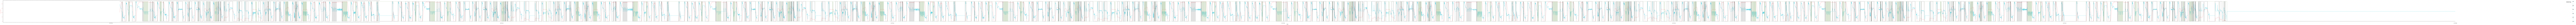

In [28]:
plt.rcParams['figure.figsize'] = [500, 5]
# plt.plot(df.time, df['train speed'], label='train speed', color='#FC9399')
# plt.plot(df.time, df['braking'], label='fwd', color='#68D6E4')
# plt.legend(fontsize=15, loc='best')
# plt.show()

fig, ax1 = plt.subplots()
color = '#FC9399'
ax1.set_xlabel('time')
ax1.set_ylabel('train speed', color=color)
ax1.plot(df.time, df['train speed'], label='train speed', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = '#68D6E4'
ax2.set_ylabel('comparing element', color=color)  # we already handled the x-label with ax1
ax2.plot(df.time, df['p/b'], label='p/b', color=color) 
# comparing elements: p/b, motoring, braking, distance to target, train in station, permitted speed

ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0.0, 2.0)

ax3 = ax1.twinx()
ax3.plot(df.time, df['braking'], label='braking', color='#B9CEAC')

ax4 = ax1.twinx()
ax4.plot(df.time, df['motoring'], label='motoring', color='gray')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(fontsize=15, loc='best')

plt.show()